Rishu Khurana
_OPD20036
_AML

#1. Find five recipes that you like the most from any of the online repositories.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import platform
import time
import pathlib
import os
import json
import zipfile

In [ ]:
# Create cache folder.
cache_dir = './tmp'
pathlib.Path(cache_dir).mkdir(exist_ok=True)

In [ ]:
# Download and unpack the dataset.
dataset_file_name = 'recipes_raw.zip'
dataset_file_origin = 'https://storage.googleapis.com/recipe-box/recipes_raw.zip'

dataset_file_path = tf.keras.utils.get_file(
    fname=dataset_file_name,
    origin=dataset_file_origin,
    cache_dir=cache_dir,
    extract=True,
    archive_format='zip'
)

print(dataset_file_path)

./tmp/datasets/recipes_raw.zip


Q1(a): Extract and represent the information from them in the traditional form ingredients and cooking instructions

In [ ]:
#Combining all the three dataset
def load_dataset(silent=False):
    dataset_file_names = [
        'recipes_raw_nosource_ar.json',
        'recipes_raw_nosource_epi.json',
        'recipes_raw_nosource_fn.json',
    ]

    dataset = []

    for dataset_file_name in dataset_file_names:
        dataset_file_path = f'{cache_dir}/datasets/{dataset_file_name}'

        with open(dataset_file_path) as dataset_file:
            json_data_dict = json.load(dataset_file)
            json_data_list = list(json_data_dict.values())
            dict_keys = [key for key in json_data_list[0]]
            dict_keys.sort()
            dataset += json_data_list

            if silent == False:
                print(dataset_file_path)
                print('===========================================')
                print('Number of examples: ', len(json_data_list), '\n')
                print('Example object keys:\n', dict_keys, '\n')
                print('Example object:\n', json_data_list[0], '\n')
                print('Required keys:\n')
                print('  title: ', json_data_list[0]['title'], '\n')
                print('  ingredients: ', json_data_list[0]['ingredients'], '\n')
                print('  instructions: ', json_data_list[0]['instructions'])
                print('\n\n')

    return dataset

In [ ]:
dataset_raw = load_dataset()

./tmp/datasets/recipes_raw_nosource_ar.json
Number of examples:  39802 

Example object keys:
 ['ingredients', 'instructions', 'picture_link', 'title'] 

Example object:
 {'title': 'Slow Cooker Chicken and Dumplings', 'ingredients': ['4 skinless, boneless chicken breast halves ADVERTISEMENT', '2 tablespoons butter ADVERTISEMENT', '2 (10.75 ounce) cans condensed cream of chicken soup ADVERTISEMENT', '1 onion, finely diced ADVERTISEMENT', '2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ADVERTISEMENT', 'ADVERTISEMENT'], 'instructions': 'Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.\nCover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.\n', 'picture_link': '55lznCYBbs2mT8BTx6BTkLhynGHzM.S'} 

Required keys:

  title:  Slow Cooker Chicken and Dumplings 

  ingredients:  ['4 skinless, boneless chicke

In [ ]:
print('Total number of raw examples: ', len(dataset_raw))

Total number of raw examples:  125164


In [ ]:
# Filters out datarows which don't have 1. title, 2. ingredients or 3.instructions.
def recipe_validate_required_fields(recipe):
    required_keys = ['title', 'ingredients', 'instructions']

    if not recipe:
        return False

    for required_key in required_keys:
        if not recipe[required_key]:
            return False

        if type(recipe[required_key]) == list and len(recipe[required_key]) == 0:
            return False

    return True

In [ ]:
dataset_validated = [recipe for recipe in dataset_raw if recipe_validate_required_fields(recipe)]
dataset_validated

[{'ingredients': ['4 skinless, boneless chicken breast halves ADVERTISEMENT',
   '2 tablespoons butter ADVERTISEMENT',
   '2 (10.75 ounce) cans condensed cream of chicken soup ADVERTISEMENT',
   '1 onion, finely diced ADVERTISEMENT',
   '2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ADVERTISEMENT',
   'ADVERTISEMENT'],
  'instructions': 'Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.\nCover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.\n',
  'picture_link': '55lznCYBbs2mT8BTx6BTkLhynGHzM.S',
  'title': 'Slow Cooker Chicken and Dumplings'},
 {'ingredients': ['2 (10.75 ounce) cans condensed cream of mushroom soup ADVERTISEMENT',
   '1 (1 ounce) package dry onion soup mix ADVERTISEMENT',
   '1 1/4 cups water ADVERTISEMENT',
   '5 1/2 pounds pot roast ADVERTISEMENT',
   'ADVERTISEMENT'],
  'instr

In [ ]:
print('Dataset size BEFORE validation', len(dataset_raw))
print('Dataset size AFTER validation', len(dataset_validated))
print('Number of invalide recipes', len(dataset_raw) - len(dataset_validated))

Dataset size BEFORE validation 125164
Dataset size AFTER validation 122938
Number of invalide recipes 2226


In [ ]:
STOP_WORD_TITLE = '📗 '
STOP_WORD_INGREDIENTS = '\n🥕\n\n'
STOP_WORD_INSTRUCTIONS = '\n📝\n\n'

In [ ]:
# Converts data of recipes into string (sequence of characters)
def recipe_to_string(recipe):
    noize_string = 'ADVERTISEMENT' #Cleaning any noise

    title = recipe['title']
    ingredients = recipe['ingredients']
    instructions = recipe['instructions'].split('\n')

    ingredients_string = ''
    for ingredient in ingredients:
        ingredient = ingredient.replace(noize_string, '')
        if ingredient:
            ingredients_string += f'• {ingredient}\n'

    instructions_string = ''
    for instruction in instructions:
        instruction = instruction.replace(noize_string, '')
        if instruction:
            instructions_string += f'▪︎ {instruction}\n'

    return f'{STOP_WORD_TITLE}{title}\n{STOP_WORD_INGREDIENTS}{ingredients_string}{STOP_WORD_INSTRUCTIONS}{instructions_string}'

In [ ]:
dataset_stringified = [recipe_to_string(recipe) for recipe in dataset_validated]

print('Stringified dataset size: ', len(dataset_stringified))

Stringified dataset size:  122938


Five recipes

In [ ]:
for recipe_index, recipe_string in enumerate(dataset_stringified[25:30]):
    print('Recipe #{}\n---------'.format(recipe_index + 1))
    print(recipe_string)
    print('\n')

Recipe #1
---------
📗 Bailey's Irish Cream Brownies

🥕

• 2 (19.8 ounce) packages fudge brownie mix (such as Duncan Hines®) 
• 1 cup Irish cream liqueur (such as Baileys®) 
• 2/3 cup vegetable oil 
• 2 eggs 
• 1 cup unsalted butter, softened 
• 5 tablespoons Irish cream liqueur (such as Baileys®) 
• 4 cups confectioners' sugar 

📝

▪︎ Preheat oven to 350 degrees F (175 degrees C).
▪︎ Butter the bottom of a 10 1/2x15 1/2-inch jelly roll pan.
▪︎ Place fudge brownie mix into a large bowl; beat in 1 cup of Irish cream liqueur, vegetable oil, and eggs until the mixture forms a smooth batter.
▪︎ Spread the batter into the prepared jelly roll pan.
▪︎ Bake in the preheated oven until the brownies are set and a toothpick inserted into the center comes out clean, about 20 minutes. Remove pan from oven and allow to cool completely.
▪︎ Beat unsalted butter in a large bowl until smooth; beat in 5 tablespoons Irish cream liqueur until mixture is creamy.
▪︎ Slowly beat in confectioners' sugar, 1 cup 

Q1-(b) Further, store the recipes in the form of a Recipe ID as title ,          Ingredient Name form

In [ ]:
import pandas as pd
from wordcloud import WordCloud

def minimal_wordcloud(df, column):
    """
    Generate a simple wordcloud similar to:
    https://amueller.github.io/word_cloud/auto_examples/simple.html.
    The only import required is: from wordcloud import WordCloud
    """
    text = str(df[column].values)
    wordcloud = WordCloud().generate(text)
    image = wordcloud.to_image()
    return image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
recipe_df = pd.read_csv('IndianFoodDatasetCSV.csv')
print('Number of recipes in dataset: ', len(recipe_df))
print('First 5 recipes:')


Number of recipes in dataset:  6871
First 5 recipes:


In [ ]:
recipe_df.head(5)

,Srno,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
0,1,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,2,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
3,4,Gongura Chicken Curry Recipe - Andhra Style Go...,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...","500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
4,5,आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2...","1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,आंध्रा स्टाइल आलम पचड़ी बनाने के लिए सबसे पहले ...,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...


In [ ]:
recipe_df[['RecipeName','Ingredients']].head(5)

,RecipeName,Ingredients
0,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S..."
1,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी..."
2,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On..."
3,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -..."
4,आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...,"1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2..."


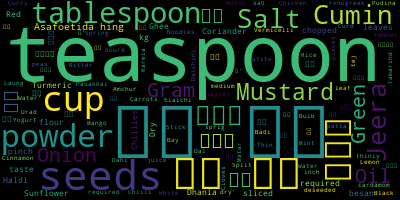

In [ ]:
minimal_wordcloud(recipe_df,'Ingredients')

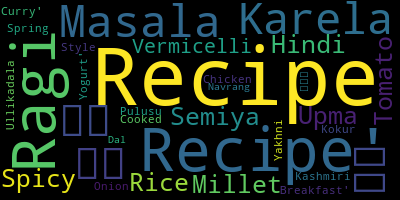

In [ ]:
minimal_wordcloud(recipe_df,'RecipeName')

INTERPRETATION (c and d)

Coarse-graining has become an area of tremendous importance within many different research
fields. For simulation, coarse-graining bears the promise of finding simplified models such
that long-time simulations of large-scale systems become computationally tractable. While significant progress has been made in tuning thermodynamic properties of reduced models, it remains a
key challenge to ensure that relevant properties are retained by coarse-grained dynamical
systems.

Coarse-graining or model reduction is the process of describing a high-dimensional and complex dynamical system
by a smaller set of variables, and of providing a new set of governing equations for this reduced description.

Two sources of error that are relevant to CG models in order to guide further methods development: “representability” errors, which result from the finite basis associated with the chosen functional form of the CG model and mapping operator, and “information” errors, which result from the limited kind and quantity of data supplied to the CG parameterization algorithm.

#2. Obtain the data of recipes from Kaggle and analyze it for the following.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from collections import Counter
import json
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_trainset = pd.read_json('/content/train.json')

df_testset = pd.read_json('/content/test.json')

In [ ]:
df_trainset.head(5)

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [ ]:
df_testset.head(5)

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


Q-2 a) No. of recipes ,no. of cuisines and no. of unique ingredients.

In [ ]:
total_cuisines = set(df_trainset['cuisine'])
total_cuisines

{'brazilian',
 'british',
 'cajun_creole',
 'chinese',
 'filipino',
 'french',
 'greek',
 'indian',
 'irish',
 'italian',
 'jamaican',
 'japanese',
 'korean',
 'mexican',
 'moroccan',
 'russian',
 'southern_us',
 'spanish',
 'thai',
 'vietnamese'}

In [ ]:
print('No. of unique cuisines',len(df_trainset.cuisine.unique()))

No. of unique cuisines 20


In [ ]:
all_ingre = set()
for ingre in df_trainset['ingredients']:
    all_ingre = all_ingre | set(ingre)
len(all_ingre)
print('No. of unique ingredients- ',len(set(all_ingre)))

No. of unique ingredients-  6714


In [ ]:
cuis = df_trainset.cuisine.unique()
cuis

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [ ]:
cuisines = []
recipe = []
for i in cuis:
  data = df_trainset.loc[ df_trainset.cuisine == i ]
  recep = len(data.id.unique())
  cuisines.append(i)
  recipe.append(recep)

In [ ]:
cuisines=df_trainset['cuisine'].value_counts()
cuisines

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

No. of recipes in dataset

In [ ]:
n_recipes = df_trainset.shape[0]
print('This dataset has %i recipes.' % n_recipes)

This dataset has 39774 recipes.


b) Bar plot for no. of recipes for each cuisine

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

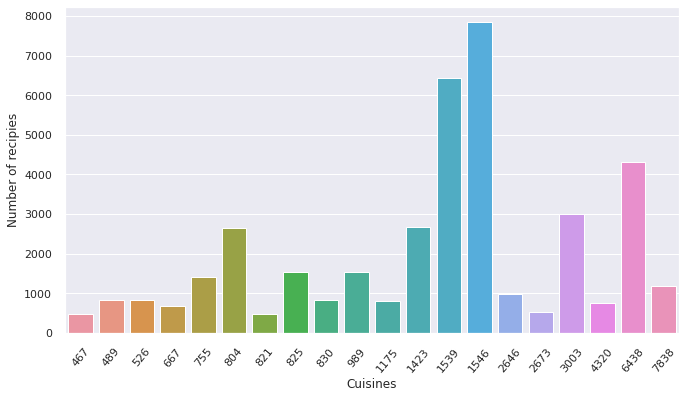

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
fig, ax = plt.subplots(figsize=(11, 6))

ax = sns.barplot(x=cuisines, y=recipe)
plt.xlabel("Cuisines")
plt.ylabel("Number of recipies")
plt.xticks(rotation=50)

Text(0.5, 1.0, 'Number of recipes per cuisine')

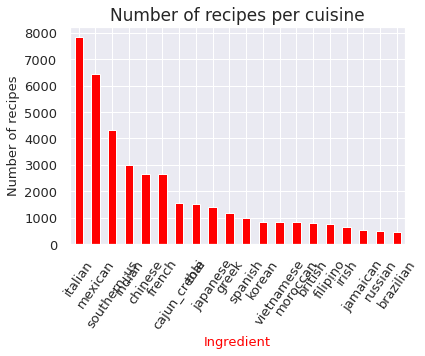

In [ ]:
ax =cuisines.plot(kind='bar', rot=55, fontsize=13,color='red')
ax.set_xlabel('Ingredient', fontsize=13,color='red')
ax.set_ylabel('Number of recipes', fontsize=13)
ax.set_title('Number of recipes per cuisine', fontsize=17)

Average number of ingredients

In [ ]:
total_ingredients = 0
for ingredients in df_trainset['ingredients']:
    total_ingredients += len(ingredients)
avg_ingredients = total_ingredients / n_recipes
avg_ingredients

10.76771257605471

In [ ]:
vocabulary= {}
for ingredient, i in zip(all_ingre, range(len(all_ingre))):
    vocabulary[ingredient] = i

In [ ]:
vocabulary

{'bird chile': 0,
 'red': 1,
 'black lentil': 2,
 'pareve margarine': 3,
 'Lipton® Recipe Secrets® Onion Soup Mix': 4,
 'sun-dried tomatoes in oil': 5,
 'bone broth': 6,
 'daal': 7,
 'bouillon powder': 8,
 'demi baguette': 9,
 'organic cane sugar': 10,
 'sole fillet': 11,
 'sundae syrup': 12,
 'chili paste with garlic': 13,
 'ditalini pasta': 14,
 'citrus slices': 15,
 'sweet peas': 16,
 'annatto powder': 17,
 'yellow lentils': 18,
 'proscuitto di parma': 19,
 'celery flakes': 20,
 'cane syrup': 21,
 'tiger prawn': 22,
 'turkey ham': 23,
 'reduced fat ranch dressing': 24,
 'cheese curds': 25,
 'boneless beef rib eye steaks': 26,
 'all potato purpos': 27,
 'peppermint extract': 28,
 'sack': 29,
 'red kidney beans': 30,
 'poppyseeds': 31,
 'small eggs': 32,
 'blue curaçao': 33,
 'serrano': 34,
 'cooked chicken breasts': 35,
 'earl grey tea bags': 36,
 'quick-cooking hominy grits': 37,
 'sweet white miso paste': 38,
 'organic buttermilk': 39,
 'camembert': 40,
 'peach purée': 41,
 'sodium

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 50 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


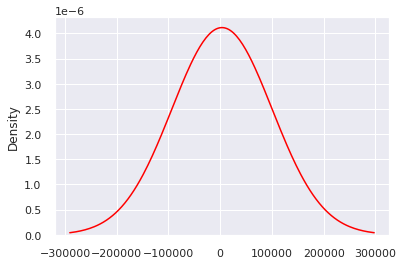

In [ ]:
sns.kdeplot(vocabulary, bw=50,color='red')

(c) Plot the recipe size distribution for each cuisine as well as for all the recipes.

Text(0.5, 1.0, 'Histogram of recipe size')

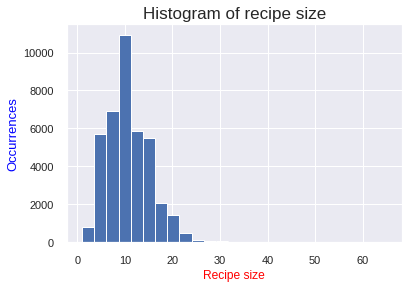

In [ ]:
size_recipe = df_trainset['ingredients'].apply(len)
ax = size_recipe.hist(bins=25)
plt.style.use('seaborn')
ax.set_xlabel('Recipe size', fontsize=12 ,color ='red')
ax.set_ylabel('Occurrences', fontsize=13, color ='blue')
ax.set_title('Histogram of recipe size', fontsize=17)

(d) Plot cumulative distribution of recipe size

Text(0.5, 1.0, 'Histogram of recipe size')

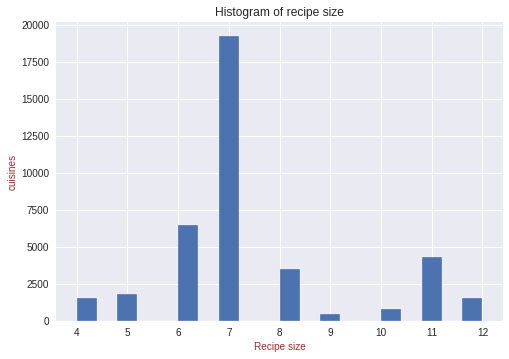

In [ ]:
size_recipe = df_trainset['cuisine'].apply(len)
ax = size_recipe.hist(bins=20),color = 'green'
ax.set_xlabel('Recipe size', fontsize=10,color = 'brown')
ax.set_ylabel('cuisines', fontsize=10,color = 'brown')
ax.set_title('Histogram of recipe size', fontsize=12,color='blue')

In [ ]:
df_testset['cuisine']='italian'

In [ ]:
submission=df_testset[['id' ,  'cuisine' ]]

#3. For the data of recipes from Kaggle:

In [ ]:
from collections import Counter
counters = {}
for cuisine in df_trainset['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (df_trainset['cuisine'] == cuisine)
    for ingredients in df_trainset[indices]['ingredients']:
        counters[cuisine].update(ingredients)

(b) List the 10 most popular ingredients in the recipes.

In [ ]:
counters['italian'].most_common(10)

[('salt', 3454),
 ('olive oil', 3111),
 ('garlic cloves', 1619),
 ('grated parmesan cheese', 1580),
 ('garlic', 1471),
 ('ground black pepper', 1444),
 ('extra-virgin olive oil', 1362),
 ('onions', 1240),
 ('water', 1052),
 ('butter', 1030)]

In [ ]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme,black pepper,garlic cloves
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions,water,tomatoes,ground black pepper,red bell pepper,pepper
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions,baking powder,large eggs


In [ ]:
stemmer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df_trainset['ingredients_clean_string1'] = [','.join(z).strip() for z in df_trainset['ingredients']]
strip = lambda x: ' , '.join(x).strip()
df_trainset['ingredients_clean_string2'] = df_trainset['ingredients'].map(strip)
df_testset['ingredients_clean_string1'] = df_testset['ingredients'].map(strip)


In [ ]:
df_trainset['ingredients_string1'] = [' '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in df_trainset['ingredients']]
df_testset['ingredients_string1'] = [' '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in df_testset['ingredients']]

In [ ]:
df_trainset['ingredients_string1']

0        romaine lettuce black olives grape tomatoes ga...
1        plain flour ground pepper salt tomato ground b...
2        egg pepper salt mayonaise cooking oil green ch...
3                           water vegetable oil wheat salt
4        black pepper shallot cornflour cayenne pepper ...
                               ...                        
39769    light brown sugar granulated sugar butter warm...
39770    KRAFT Zesty Italian Dressing purple onion broc...
39771    egg citrus fruit raisin sourdough starter flou...
39772    boneless chicken skinless thigh minced garlic ...
39773    green chile jalapeno chilies onion ground blac...
Name: ingredients_string1, Length: 39774, dtype: object

In [ ]:
ingred = df_trainset['ingredients'].apply(lambda x:','.join(x))
ingred

0        romaine lettuce,black olives,grape tomatoes,ga...
1        plain flour,ground pepper,salt,tomatoes,ground...
2        eggs,pepper,salt,mayonaise,cooking oil,green c...
3                           water,vegetable oil,wheat,salt
4        black pepper,shallots,cornflour,cayenne pepper...
                               ...                        
39769    light brown sugar,granulated sugar,butter,warm...
39770    KRAFT Zesty Italian Dressing,purple onion,broc...
39771    eggs,citrus fruit,raisins,sourdough starter,fl...
39772    boneless chicken skinless thigh,minced garlic,...
39773    green chile,jalapeno chilies,onions,ground bla...
Name: ingredients, Length: 39774, dtype: object

In [ ]:
cortrain = df_trainset['ingredients_string1']
cortest = df_testset['ingredients_string1']
cortrain

0        romaine lettuce black olives grape tomatoes ga...
1        plain flour ground pepper salt tomato ground b...
2        egg pepper salt mayonaise cooking oil green ch...
3                           water vegetable oil wheat salt
4        black pepper shallot cornflour cayenne pepper ...
                               ...                        
39769    light brown sugar granulated sugar butter warm...
39770    KRAFT Zesty Italian Dressing purple onion broc...
39771    egg citrus fruit raisin sourdough starter flou...
39772    boneless chicken skinless thigh minced garlic ...
39773    green chile jalapeno chilies onion ground blac...
Name: ingredients_string1, Length: 39774, dtype: object

In [ ]:
from operator import itemgetter
import nltk
import pandas as pd
from nltk.corpus import stopwords
from matplotlib import pyplot as plt

(a) Plot the frequency-rank distribution for all the recipes

In [ ]:
freq= {}
ingredients = vocabulary
ingredients = [word.lower() for word in ingredients if word.isalpha()]
for word in ingredients :
    count = freq.get(word , 0)
    freq[ word ] = count + 1

rank = 1
column_header = ['Rank', 'Frequency']
df = pd.DataFrame( columns = column_header )
collection = sorted(freq.items(), key=itemgetter(1), reverse = True)


for word , freq in collection:
    df.loc[word] = [rank, freq]
    rank = rank + 1
df

,Rank,Frequency
red,1,1
daal,2,1
sack,3,1
poppyseeds,4,1
serrano,5,1
...,...,...
gelatin,1160,1
drambuie,1161,1
yuzukosho,1162,1
crumbles,1163,1


Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Ingredients')]

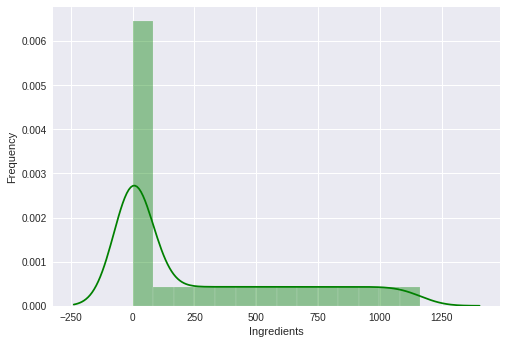

In [ ]:
ax = sns.distplot(df,kde=True , color='green')
ax.set(xlabel='Ingredients', ylabel='Frequency')

(c) Plot the ingredient-rank distribution for each of the cuisines and list the most popular
ingredients for each cuisine.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


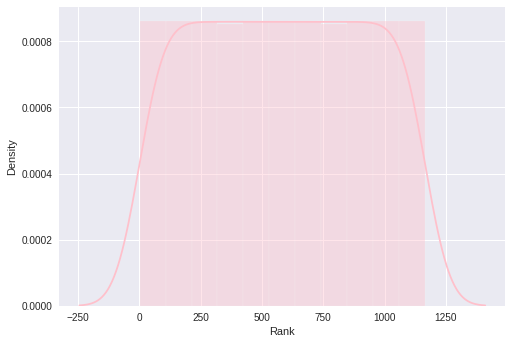

In [ ]:
ax = sns.distplot(df['Rank'],kde=True , color='pink')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


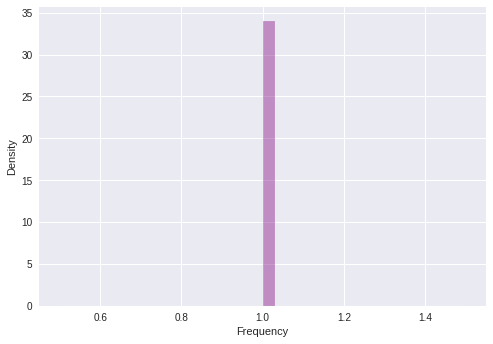

In [ ]:
ax = sns.distplot(df['Frequency'],kde=True , color='purple')


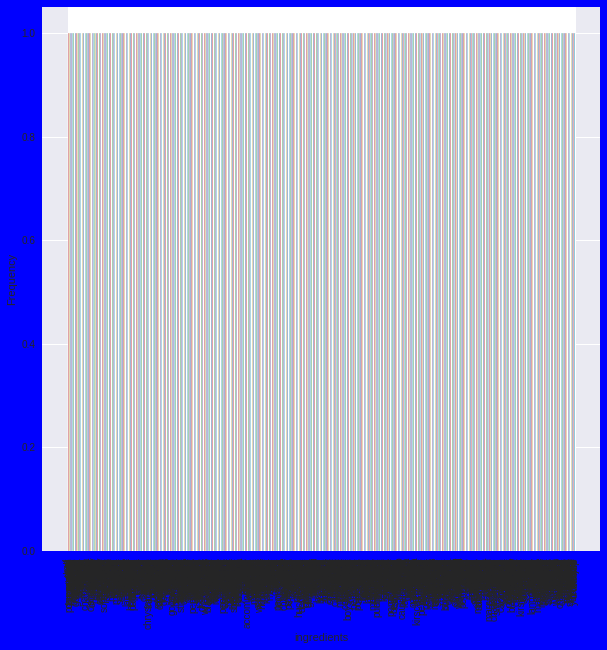

In [ ]:

plt.figure(figsize=(10,10),edgecolor ='red',facecolor = 'blue')
plt.ylabel("Frequency")
plt.xlabel("ingredients")
plt.xticks(rotation=90)

for word , freq in collection:
    plt.bar(word, freq)
plt.show()

In [ ]:
 vectrain = TfidfVectorizer(stop_words='english',
                             ngram_range = ( 1 , 1 ),analyzer="word",
                             max_df = .57 , binary=False , token_pattern=r'\w+' , sublinear_tf=False)
vectest = TfidfVectorizer(stop_words='english')

In [ ]:

tfidf_trainset=vectrain.fit_transform(cortrain)
trainpred = tfidf_trainset

In [ ]:
tfidf_testset=vectrain.transform(cortest)
testpred= tfidf_testset

In [ ]:
 targettrain = df_trainset['cuisine']

In [ ]:
 parameters = {'C':[1, 10]}
clf = LogisticRegression()

#4. Build machine learning models for classification of cuisines.

In [ ]:
from sklearn.model_selection import GridSearchCV
classifier = GridSearchCV(clf, parameters)
classifier=classifier.fit(trainpred,targettrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
 pred=classifier.predict(testpred)

In [ ]:
df_testset['cuisine'] = pred

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(n_estimators = 10)

In [ ]:
forest = forest.fit(trainpred,targettrain)

In [ ]:
predict = forest.predict(testpred)

In [ ]:
df_testset['cuisine'] = predict

In [ ]:
ingredients = df_trainset['ingredients'].apply(lambda x:','.join(x))
ingredients
df_trainset

,id,cuisine,ingredients,ingredients_clean_string1,ingredients_clean_string2,ingredients_string1
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce,black olives,grape tomatoes,ga...","romaine lettuce , black olives , grape tomatoe...",romaine lettuce black olives grape tomatoes ga...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour,ground pepper,salt,tomatoes,ground...","plain flour , ground pepper , salt , tomatoes ...",plain flour ground pepper salt tomato ground b...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs,pepper,salt,mayonaise,cooking oil,green c...","eggs , pepper , salt , mayonaise , cooking oil...",egg pepper salt mayonaise cooking oil green ch...
3,22213,indian,"[water, vegetable oil, wheat, salt]","water,vegetable oil,wheat,salt","water , vegetable oil , wheat , salt",water vegetable oil wheat salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","black pepper,shallots,cornflour,cayenne pepper...","black pepper , shallots , cornflour , cayenne ...",black pepper shallot cornflour cayenne pepper ...
...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...","light brown sugar,granulated sugar,butter,warm...","light brown sugar , granulated sugar , butter ...",light brown sugar granulated sugar butter warm...
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...","KRAFT Zesty Italian Dressing,purple onion,broc...","KRAFT Zesty Italian Dressing , purple onion , ...",KRAFT Zesty Italian Dressing purple onion broc...
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...","eggs,citrus fruit,raisins,sourdough starter,fl...","eggs , citrus fruit , raisins , sourdough star...",egg citrus fruit raisin sourdough starter flou...
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...","boneless chicken skinless thigh,minced garlic,...","boneless chicken skinless thigh , minced garli...",boneless chicken skinless thigh minced garlic ...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_trainset['ingredients_string1'])

print(X)

  (0, 721)	0.33470078357758687
  (0, 508)	0.1458494223406661
  (0, 941)	0.30438203532210567
  (0, 172)	0.20933523385450295
  (0, 1074)	0.3889730988891325
  (0, 2389)	0.23034068830753504
  (0, 1861)	0.11919980380981804
  (0, 2171)	0.23940422875669587
  (0, 1987)	0.10220024018746883
  (0, 1080)	0.10543052862276961
  (0, 2758)	0.17793349661633953
  (0, 1154)	0.3473360314647663
  (0, 1857)	0.26844637455934556
  (0, 236)	0.14005534054965388
  (0, 1511)	0.266690154534429
  (0, 2282)	0.3430569328892925
  (1, 1848)	0.11776058327805798
  (1, 2864)	0.21262361824792758
  (1, 1693)	0.2135975785684864
  (1, 1651)	0.4060947060629038
  (1, 660)	0.2224840480314699
  (1, 2970)	0.28002210950290646
  (1, 1175)	0.19056748812173793
  (1, 875)	0.21431071591417875
  (1, 2736)	0.27489245055428957
  :	:
  (39772, 875)	0.10284981087193673
  (39772, 2336)	0.05252243917159206
  (39772, 997)	0.08891032810817563
  (39772, 1080)	0.06158879878121565
  (39773, 474)	0.25675475040802453
  (39773, 2280)	0.400523710797131

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

cls = Pipeline([
    ('vect', CountVectorizer(vocabulary=vocabulary)),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])


In [ ]:
train_ingredients = df_trainset['ingredients_string1']
cls.fit(train_ingredients, df_trainset['cuisine'])
cls.score(train_ingredients, df_trainset['cuisine'])

0.7194398350681349

In [ ]:
pred = cls.predict(train_ingredients)
pred

array(['greek', 'southern_us', 'filipino', ..., 'southern_us', 'chinese',
       'mexican'], dtype='<U12')

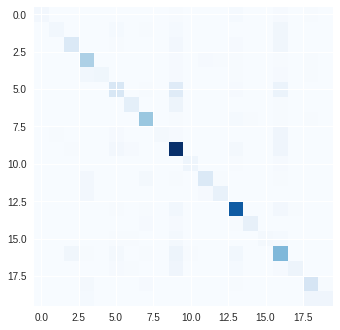

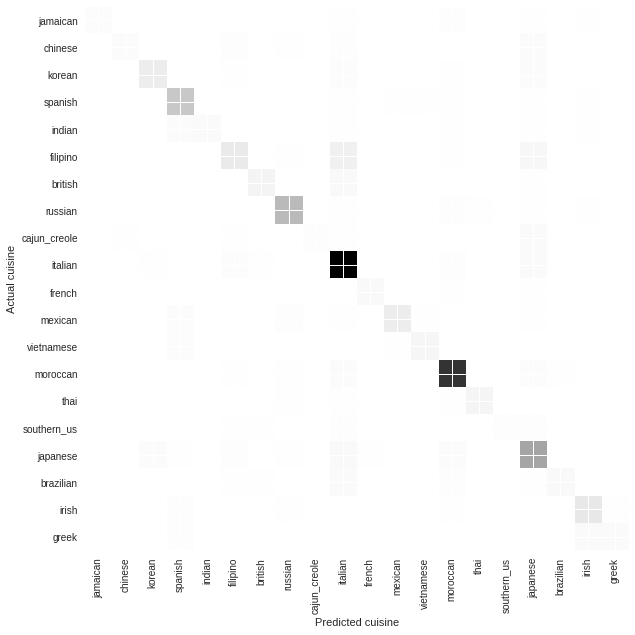

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(df_trainset['cuisine'], pred)
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)

import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(confusion_matrix)
ax.set_xticks(np.arange(len(total_cuisines)))
ax.set_yticks(np.arange(len(total_cuisines)))
ax.set_xticklabels(total_cuisines, rotation=90)
ax.set_yticklabels(total_cuisines)
ax.set_xlabel('Predicted cuisine')
ax.set_ylabel('Actual cuisine')
im;